In [1]:
import pandas as pd
import numpy as np


In [12]:
power_data=pd.read_csv("Solar_Dataset/Plant_1_Generation_Data.csv")
power_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [13]:
weather_data=pd.read_csv("Solar_Dataset/Plant_1_Weather_Sensor_Data.csv")
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [15]:
power_data["DATE_TIME"]=pd.to_datetime(power_data['DATE_TIME'])
weather_data["DATE_TIME"]=pd.to_datetime(weather_data['DATE_TIME'])

C:\Users\prsho\AppData\Local\Temp\ipykernel_21456\799564322.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  power_data["DATE_TIME"]=pd.to_datetime(power_data['DATE_TIME'])


In [16]:
merged_df=pd.merge(power_data, weather_data, on="DATE_TIME", how="inner")

In [17]:
merged_df.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [18]:
merged_df['Hour']=merged_df['DATE_TIME'].dt.hour

In [19]:
merged_df.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Hour
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0


In [25]:
final_df=merged_df[["DATE_TIME","DC_POWER","AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION","Hour"]]

In [28]:
final_df

,DATE_TIME,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Hour
0,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0,0
1,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0,0
2,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0,0
3,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0,0
4,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0,0
...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,0.0,21.909288,20.427972,0.0,23
68770,2020-06-17 23:45:00,0.0,21.909288,20.427972,0.0,23
68771,2020-06-17 23:45:00,0.0,21.909288,20.427972,0.0,23
68772,2020-06-17 23:45:00,0.0,21.909288,20.427972,0.0,23


In [30]:
final_df.columns=["DATE_TIME","DC_POWER","AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION","HOUR"]

In [31]:
final_df.head()

,DATE_TIME,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR
0,2020-05-15,0.0,25.184316,22.857507,0.0,0
1,2020-05-15,0.0,25.184316,22.857507,0.0,0
2,2020-05-15,0.0,25.184316,22.857507,0.0,0
3,2020-05-15,0.0,25.184316,22.857507,0.0,0
4,2020-05-15,0.0,25.184316,22.857507,0.0,0


In [36]:
final_df.duplicated().sum()

30624

In [37]:
final_df.isnull().sum()

DATE_TIME              0
DC_POWER               0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
HOUR                   0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
final_df.head()

,DATE_TIME,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR
0,2020-05-15,0.0,25.184316,22.857507,0.0,0
1,2020-05-15,0.0,25.184316,22.857507,0.0,0
2,2020-05-15,0.0,25.184316,22.857507,0.0,0
3,2020-05-15,0.0,25.184316,22.857507,0.0,0
4,2020-05-15,0.0,25.184316,22.857507,0.0,0


In [42]:
X=final_df[["AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION","HOUR"]]

In [44]:
y=final_df["DC_POWER"]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=21)

In [62]:
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.transform(X_test)

In [63]:
model=LinearRegression()

In [64]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [65]:
y_pred=model.predict(X_test_poly)

In [66]:
r2=r2_score(y_test, y_pred)

In [67]:
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))

In [68]:
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f} kW")
print(f"Root Mean Squared Error: {rmse:.2f} kW")

R-squared Score: 0.9821
Mean Squared Error: 290485.27 kW
Root Mean Squared Error: 538.97 kW


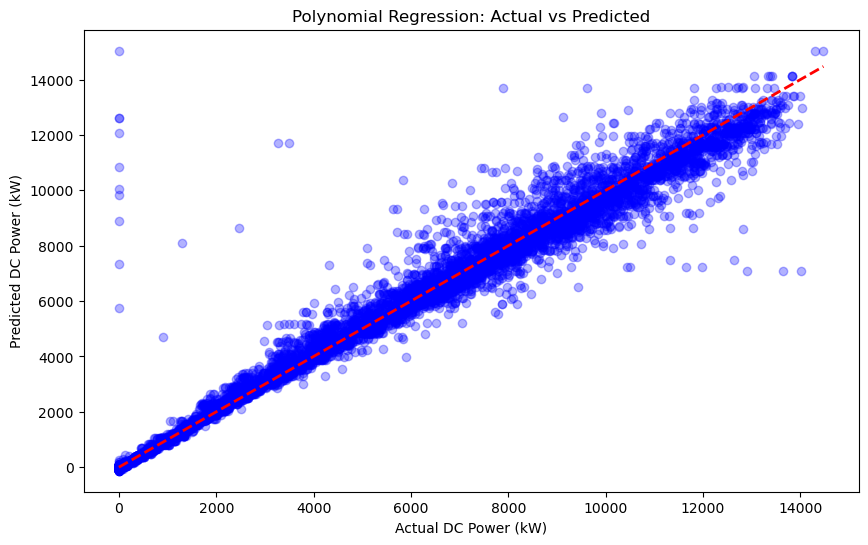

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual DC Power (kW)')
plt.ylabel('Predicted DC Power (kW)')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()

In [70]:
import pickle

In [72]:
pickle.dump(model, open("model.pkl", "wb"))

In [73]:
pickle.dump(poly_features, open("poly_features.pkl", "wb"))